[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/master/Tema_2_AnalisisEstadistico/notebook/exercises/Practica2_Scrap_WoAns.ipynb)

<h1><center>Práctica de Módulo 2</center><h1>

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [2]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [3]:
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."

In [4]:
page = 
html=page.content

In [5]:
html

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.6c22a8.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/app

In [6]:
response = requests.get(url)

In [7]:
response

<Response [200]>

In [8]:
response.text

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.6c22a8.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/appl

### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraigamos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [9]:
soup = BeautifulSoup(response.text, )

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.6c22a8.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-to

In [11]:
main_box=soup.find_all("", {"":"_13oc-S"})

In [12]:
len(main_box)

24

In [13]:
box=main_box[0]

In [14]:
box

<div class="_13oc-S"><div data-id="COMGBH9JY38MYJAZ" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/hp-core-i5-11th-gen-8-gb-512-gb-ssd-windows-11-home-15s-fq4022tu-thin-light-laptop/p/itmf9ecbfb5d9b47?pid=COMGBH9JY38MYJAZ&amp;lid=LSTCOMGBH9JY38MYJAZR8OW4T&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_nYivVRZ6GgalZ0AtiwkRzItbm67JDC9IaOTucgX8p63zETrNOVpe%2FDqvjT4GEeRstrabHNGaJXSvuXks7AJM5Q%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=c66o8lz8740000001647069024097&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq4022TU Thin and Light Laptop" class="_396cs4 _3exPp9" src="https://rukminim1.flixcart.com/image/312/312/kzrbiq80/computer/v/d/d/15s-fq2626tu-th

In [129]:
title = box.find('', {'':'_4rR01T'}).text.strip()
rating = box.find('', {'':'_3LWZlK'}).text.strip()
price = box.find('', {'':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()

In [130]:
print()

MSI GF63 Thin Core i5 10th Gen - (8 GB/1 TB HDD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce GTX 1650 ... 53,940 4.1


In [141]:
data_list=[]
for box in main_box:
    temp_dict={}
    if () is None:
        continue
    else:
        temp_dict['rating'] = 
        temp_dict['title'] = 
        temp_dict['price'] = 
        .append()

[{'rating': '4.3',
  'title': 'MSI Stealth 15M Core i7 11th Gen - (16 GB/1 TB SSD/Windows 10 Home/6 GB Graphics/NVIDIA GeForce RTX 30...',
  'price': '1,14,940'},
 {'rating': '4.3',
  'title': 'Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 GB SSD/Windows 11 Home) 15IML05 Thin and Light Laptop',
  'price': '37,940'},
 {'rating': '4.4',
  'title': 'DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Inspiron 3511 Thin and Lig...',
  'price': '44,440'},
 {'rating': '4.4',
  'title': 'acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce GTX 165...',
  'price': '50,940'},
 {'rating': '4.2',
  'title': 'HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq2629TU Thin and Light Laptop',
  'price': '42,940'},
 {'rating': '4.3',
  'title': 'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 15ITL6 Thin and Light Laptop',
  'price': '39,940'},
 {'rating': '4.2',
  'title': 'lenovo Ideapad Flex 5 Core i5

### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [144]:
df1 = pd.DataFrame()

In [145]:
df1

,rating,title,price
0,4.3,MSI Stealth 15M Core i7 11th Gen - (16 GB/1 TB...,"1,14,940"
1,4.3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"37,940"
2,4.4,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,"44,440"
3,4.4,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,"50,940"
4,4.2,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,"42,940"
5,4.3,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,"39,940"
6,4.2,lenovo Ideapad Flex 5 Core i5 11th Gen Intel E...,"65,940"
7,4.3,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,"37,940"
8,4.3,HP Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/...,"38,440"
9,3.7,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,"33,940"


### Paso 5: Un poco de EDA y visualización de este archivo

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  23 non-null     object
 1   title   23 non-null     object
 2   price   23 non-null     object
dtypes: object(3)
memory usage: 680.0+ bytes


(23, 3)

rating    object
title     object
price     object
dtype: object

Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [150]:
df = df1.copy()

In [151]:
df['model'], df['spec'] = df['title'].str.split('-', 1).str
del df['title']
df.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,spec
0,4.3,"1,14,940",MSI Stealth 15M Core i7 11th Gen,(16 GB/1 TB SSD/Windows 10 Home/6 GB Graphics...
1,4.3,"37,940",Lenovo IdeaPad 3 Core i3 10th Gen,(8 GB/256 GB SSD/Windows 11 Home) 15IML05 Thi...
2,4.4,"44,440",DELL Inspiron Core i3 11th Gen,(8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) In...
3,4.4,"50,940",acer Aspire 7 Core i5 10th Gen,(8 GB/512 GB SSD/Windows 10 Home/4 GB Graphic...
4,4.2,"42,940",HP Core i3 11th Gen,(8 GB/512 GB SSD/Windows 11 Home) 15s-fq2629T...


Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,RAM,HDD
0,4.3,"1,14,940",MSI Stealth 15M Core i7 11th Gen,,16 GB/1 TB SSD/Windows 10 Home/6 GB Graphics/N...
1,4.3,"37,940",Lenovo IdeaPad 3 Core i3 10th Gen,,8 GB/256 GB SSD/Windows 11 Home) 15IML05 Thin ...
2,4.4,"44,440",DELL Inspiron Core i3 11th Gen,,8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Insp...
3,4.4,"50,940",acer Aspire 7 Core i5 10th Gen,,8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/...
4,4.2,"42,940",HP Core i3 11th Gen,,8 GB/512 GB SSD/Windows 11 Home) 15s-fq2629TU ...


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,RAM,Hard disk
0,4.3,"1,14,940",MSI Stealth 15M Core i7 11th Gen,16 GB,1 TB SSD/Windows 10 Home/6 GB Graphics/NVIDIA ...
1,4.3,"37,940",Lenovo IdeaPad 3 Core i3 10th Gen,8 GB,256 GB SSD/Windows 11 Home) 15IML05 Thin and L...
2,4.4,"44,440",DELL Inspiron Core i3 11th Gen,8 GB,1 TB HDD/256 GB SSD/Windows 11 Home) Inspiron ...
3,4.4,"50,940",acer Aspire 7 Core i5 10th Gen,8 GB,512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDI...
4,4.2,"42,940",HP Core i3 11th Gen,8 GB,512 GB SSD/Windows 11 Home) 15s-fq2629TU Thin ...


Continuemos hasta conseguir lo siguiente...

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,RAM,Storage,OS
0,4.3,"1,14,940",MSI Stealth 15M Core i7 11th Gen,16 GB,1 TB SSD,Windows 10 Home/6 GB Graphics/NVIDIA GeForce R...
1,4.3,"37,940",Lenovo IdeaPad 3 Core i3 10th Gen,8 GB,256 GB SSD,Windows 11 Home) 15IML05 Thin and Light Laptop
2,4.4,"44,440",DELL Inspiron Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home) Inspiron 3511 Thin...
3,4.4,"50,940",acer Aspire 7 Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...
4,4.2,"42,940",HP Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home) 15s-fq2629TU Thin and Light L...


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,rating,price,model,RAM,Storage,System,Other_Info
0,4.3,"1,14,940",MSI Stealth 15M Core i7 11th Gen,16 GB,1 TB SSD,Windows 10 Home/6 GB Graphics/NVIDIA GeForce R...,NaN
1,4.3,"37,940",Lenovo IdeaPad 3 Core i3 10th Gen,8 GB,256 GB SSD,Windows 11 Home,15IML05 Thin and Light Laptop
2,4.4,"44,440",DELL Inspiron Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Inspiron 3511 Thin and Lig...
3,4.4,"50,940",acer Aspire 7 Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
4,4.2,"42,940",HP Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fq2629TU Thin and Light Laptop


<bound method Series.unique of 0     4.3
1     4.3
2     4.4
3     4.4
4     4.2
5     4.3
6     4.2
7     4.3
8     4.3
9     3.7
10    4.3
11    4.2
12    4.4
13    4.3
14    4.5
15    4.6
16    4.7
17    4.7
18    4.6
19    4.3
20    4.5
21    4.4
22    4.1
Name: rating, dtype: object>

### Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

,rating,price,model,RAM,Storage,System,Other_Info
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

rating        0
price         0
model         0
RAM           0
Storage       0
System        0
Other_Info    4
dtype: int64

HP Core i3 11th Gen                                  3
ASUS TUF Gaming F15 Core i5 10th Gen                 1
ASUS VivoBook Ultra 14 (2021) Core i3 11th Gen       1
ASUS Ryzen 3 Dual Core 3250U 3rd Gen                 1
MSI GF63 Thin Core i5 10th Gen                       1
HP Pentium Quad Core                                 1
HP Ryzen 5 Hexa Core 5500U                           1
DELL Inspiron Core i3 11th Gen                       1
DELL Inspiron Ryzen 3 Dual Core 3250U                1
ASUS VivoBook 15 (2021) Core i3 10th Gen             1
HP Ryzen 3 Quad Core 5300U                           1
Lenovo IdeaPad 3 Core i3 11th Gen                    1
acer Swift 5 Core i7 11th Gen Intel EVO              1
Lenovo Legion Core i5 9th Gen                        1
MSI Stealth 15M Core i7 11th Gen                     1
Lenovo IdeaPad 3 Core i3 10th Gen                    1
lenovo Yoga 7 Core i7 11th Gen Intel EVO             1
HP Ryzen 3 Dual Core 3250U                           1
acer Aspir

,rating,price,model,RAM,Storage,System,Other_Info
count,23,23,23,23,23,23,19
unique,8,20,21,2,4,8,19
top,4.3,"42,940",HP Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,Y540-15IRH-PG...
freq,8,2,3,20,11,11,1


rating        object
price         object
model         object
RAM           object
Storage       object
System        object
Other_Info    object
dtype: object

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 4.5 y un precio entre 50 y 90 mil $

,rating,price,model,RAM,Storage,System,Other_Info
0,4.3,"1,14,940",MSI Stealth 15M Core i7 11th Gen,16 GB,1 TB SSD,Windows 10 Home/6 GB Graphics/NVIDIA GeForce R...,NaN
1,4.3,"37,940",Lenovo IdeaPad 3 Core i3 10th Gen,8 GB,256 GB SSD,Windows 11 Home,15IML05 Thin and Light Laptop
2,4.4,"44,440",DELL Inspiron Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Inspiron 3511 Thin and Lig...
3,4.4,"50,940",acer Aspire 7 Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
4,4.2,"42,940",HP Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fq2629TU Thin and Light Laptop
5,4.3,"39,940",Lenovo IdeaPad 3 Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,15ITL6 Thin and Light Laptop
6,4.2,"65,940",lenovo Ideapad Flex 5 Core i5 11th Gen Intel EVO,8 GB,512 GB SSD,Windows 10 Home,5 14ITL05 2 in 1 ...
7,4.3,"37,940",ASUS VivoBook 15 (2021) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS Thin and L...
8,4.3,"38,440",HP Ryzen 3 Dual Core 3250U,8 GB,256 GB SSD,Windows 10 Home,15s-GY0501AU Thin and Light Laptop
9,3.7,"33,940",HP Pentium Quad Core,8 GB,256 GB SSD,Windows 11 Home,14s-dq3033tu Thin and Light Laptop


,rating,price,model,RAM,Storage,System,Other_Info
9,3.7,33940.0,HP Pentium Quad Core,8 GB,256 GB SSD,Windows 11 Home,14s-dq3033tu Thin and Light Laptop


,rating,price,model,RAM,Storage,System,Other_Info
14,4.5,57949.0,HP Pavilion Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 10 Home,15-eh1101AU Thin and Light Lap...
15,4.6,51450.0,HP Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 11 Home,14s-fq1092au Thin and Light Laptop
20,4.5,57940.0,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...,NaN


---------

### Visualización de los datos

Realizaremos una gráfica de barras de precio vs rating

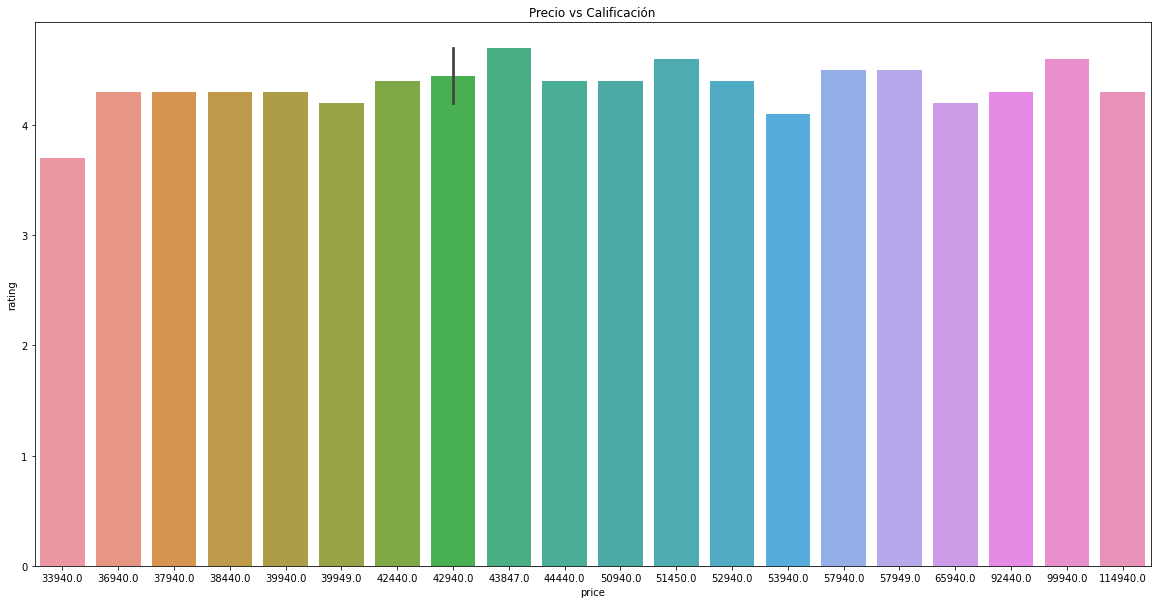

Text(0.5, 1.0, 'Calificación vs Precio')

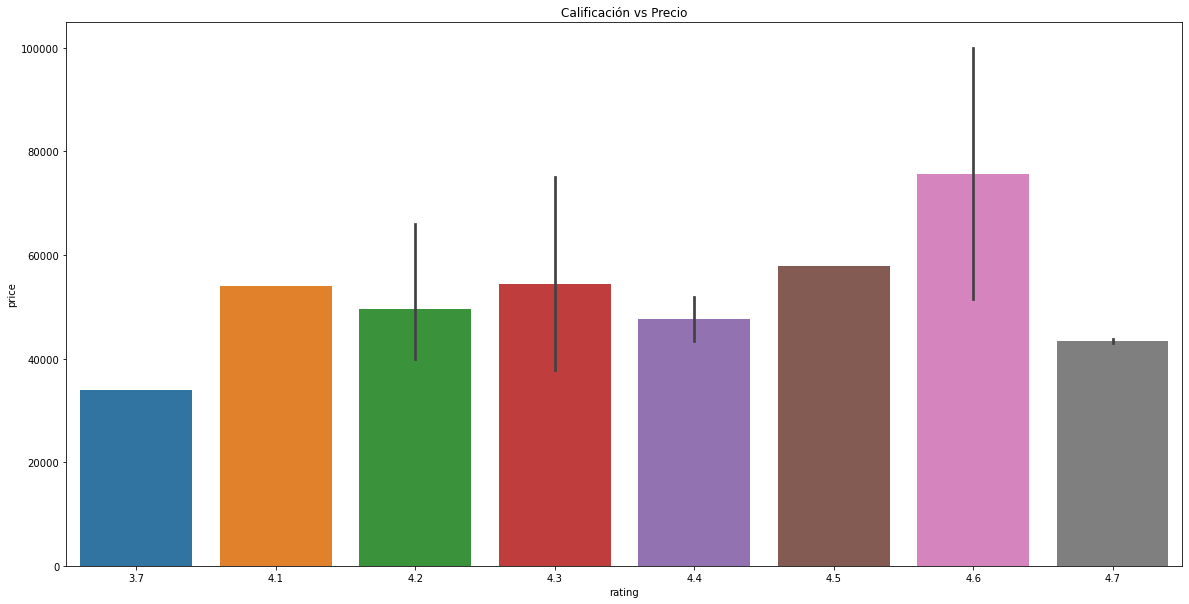

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

Text(0.5, 1.0, 'Box plot')

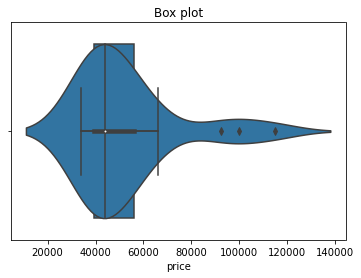

## ¿Les ha salido algún discordante visual a ustedes?

,rating,price,model,RAM,Storage,System,Other_Info
0,4.3,114940.0,MSI Stealth 15M Core i7 11th Gen,16 GB,1 TB SSD,Windows 10 Home/6 GB Graphics/NVIDIA GeForce R...,NaN
6,4.2,65940.0,lenovo Ideapad Flex 5 Core i5 11th Gen Intel EVO,8 GB,512 GB SSD,Windows 10 Home,5 14ITL05 2 in 1 ...
10,4.3,92440.0,acer Swift 5 Core i7 11th Gen Intel EVO,16 GB,1 TB SSD,Windows 10 Home,SF514-55TA-72VG Thin and Li...
18,4.6,99940.0,lenovo Yoga 7 Core i7 11th Gen Intel EVO,16 GB,512 GB SSD,Windows 10 Home,14ITL5 2 in 1 Laptop


### ¿Para ustedes, cuáles fueron las computadoras más caras?